<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

**Analisi di serie temporali**:

Per aiutarti negli esercizi che seguiranno, ricorda:

**Stagionalità**: tendenza di una variabile a ripetere periodicamente il proprio comportamento si chiama stagionalità.

La stagionalità (annuale) è semplice con l'energia solare: ogni anno osserviamo lo stesso comportamento, dovuto alla disponibilità di luce solare.

La stagionalità non è necessariamente meterologica: pensate ai saldi durante le festività natalizie.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Utilizzando il dataset denominato *OPSD_Germany_all*, svolgi i seguenti esercizi:

- Esercizio 1

    Usa gli strumenti che abbiamo visto finora per tracciare il consumo di energia elettrica.

    Che tipo di **stagionalità** possiamo osservare su questa variabile? Come può essere interpretato?
    

- Esercizio 2

    Analizza la stagionalità settimanale del consumo di energia elettrica utilizzando le funzioni groupby (Pandas) ed eventualmente aiutati creando boxplot con Seaborn.
    

- Esercizio 3

    Confronta (all'interno di un singolo grafico) la serie mensile (di un anno a scelta) di:
    - consumo di energia elettrica 
    - produzione di energia rinnovabile (solare, eolica e la somma delle due).
   
    Tracciare la serie annuale del rapporto tra
    - produzione di energia rinnovabile
    - consumo di energia elettrica
    

- Esercizio 4 [facoltativo]

    Il resampling e il rolling nelle serie temporali sono due modi per implementare medie incrementali nel tempo. 

Traccia la produzione settimanale di energia solare durante il 2017/01-07 utilizzando resample e rolling. Confronta i risultati grafici.

Esercizio 1)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('OPSD_Germany_all.csv')
df.head()

,Date,Consumption,Wind,Solar
0,2006-01-01,1069.184,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN


In [13]:
df.set_index('Date', inplace=True)

<AxesSubplot: title={'center': 'Renawable energy production (GWh)'}, xlabel='Date'>

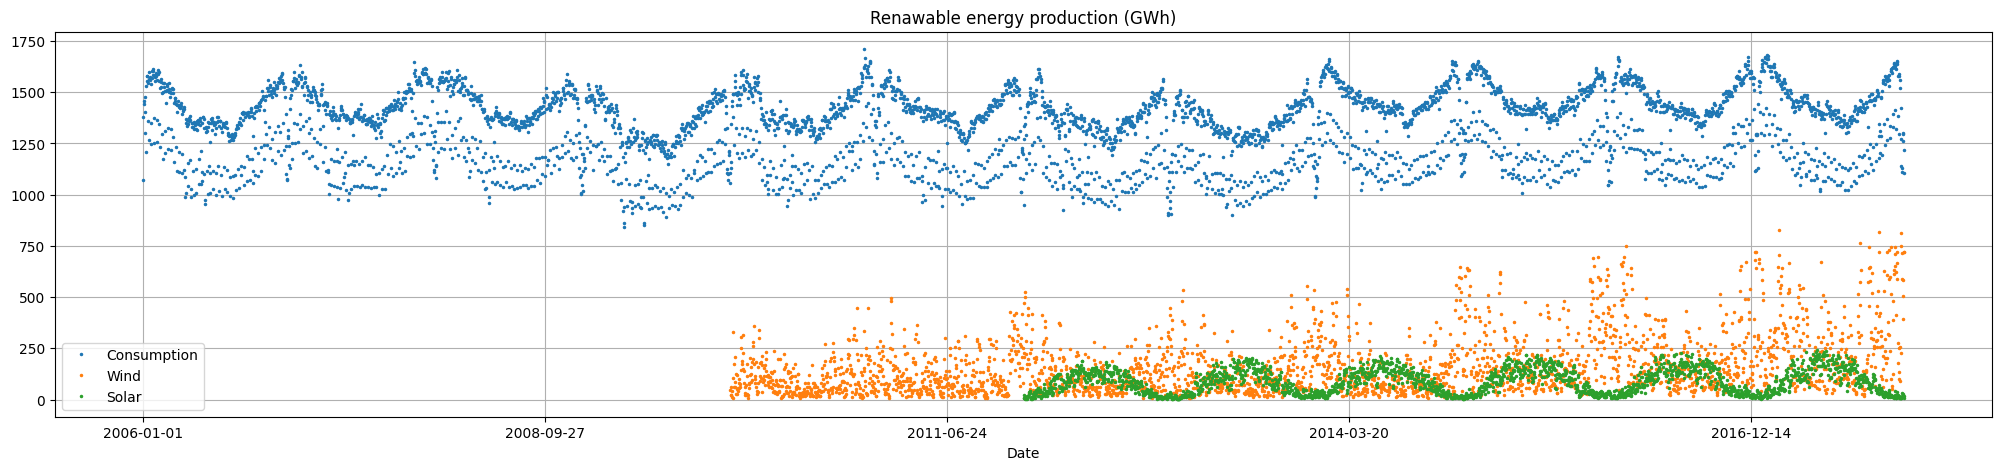

In [15]:
df.plot(figsize=(25, 5),
        title='Renawable energy production (GWh)',
        marker='.',
        markersize=3,
        linestyle='',
        grid=True)

Osserviamo un consumo energetico che ha un tipo di stagionalità annuale

Esercizio 2)

Per analizzare la stagionalità settimanale effettuiamo con pandas un group-by